In [138]:
import numpy as np
import pandas as pd
import networkx as nx
import random
import matplotlib.pylab as plt
import math
from random import randint
import scipy.stats as st
import statistics
import bisect 

# Phase 1

### Static

In [8]:
# ehtemale kharabi ra dar yek baze 0 va 1 dar nazar migirim

In [9]:
def irreducible(Graph,n,p_node):
    cnt = 0
    for iteration in range(1000):
        G = Graph.copy()
        res = True
        for node in range(n):
            rand_p = random.uniform(0, 1)
            if p_node > rand_p :
                G.remove_node(node)
        for i in G.nodes :
            for j in G.nodes :
                if (not nx.has_path(G, i, j)) and (i!=j) :
                    res = False
        if res :
            cnt = cnt + 1
    reducibility_prob = cnt/1000
    
    return reducibility_prob
                

In [10]:
node_p = []
for i in range(1,11):
    node_p.append(i/10)
    

### Erdos-Renyi

khataye shabih sazi va fasele etminan baraye motevassete an : (0.25748462428811814, 0.7387153757118818)


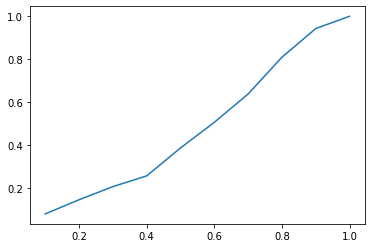

In [11]:
n = 5 
p = 0.3
Ger = nx.erdos_renyi_graph(n,p)
prob = []
for pbad in node_p:
    prob.append(irreducible(Ger,n,pbad)) 
plt.plot(node_p,prob)
err = st.t.interval(alpha = 0.95, df = len(prob) - 1, loc = np.mean(prob), scale = st.sem(prob)) 
print('khataye shabih sazi va fasele etminan baraye motevassete an :',err)

### Barabasi–Albert

khataye shabih sazi va fasele etminan baraye motevassete an : (0.8260391794835604, 0.9409608205164397)


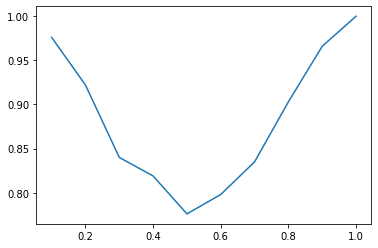

In [12]:
n = 5
# m is the number of edges to attach from a new node to existing nodes
m = 2
Gba = nx.barabasi_albert_graph(n, m)
prob = []
for pbad in node_p:
    prob.append(irreducible(Gba,n,pbad)) 
plt.plot(node_p,prob)
err = st.t.interval(alpha = 0.95, df = len(prob) - 1, loc = np.mean(prob), scale = st.sem(prob)) 
print('khataye shabih sazi va fasele etminan baraye motevassete an :',err)

### Watts–Strogatz

khataye shabih sazi va fasele etminan baraye motevassete an : (0.6686366081706365, 0.8673633918293635)


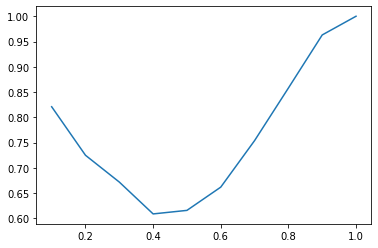

In [13]:
n = 5
# k is : number of nodes  connected to k nearest neighbors in ring topology
k = 2
# p is : the probability of rewiring each edge
p = 0.5
Gws = nx.watts_strogatz_graph(n, k, p)
prob = []
for pbad in node_p:
    prob.append(irreducible(Gws,n,pbad)) 
plt.plot(node_p,prob)
err = st.t.interval(alpha = 0.95, df = len(prob) - 1, loc = np.mean(prob), scale = st.sem(prob)) 
print('khataye shabih sazi va fasele etminan baraye motevassete an :',err)

### prove num3 formula

In [14]:
def connection_prob(G):
    res = []
    for pbad in node_p:
        degs = G.degree()
        sum_pk = 0
        for node in range(len(degs)):
            sum_pk += pbad**degs[node] #jam'e p^ki
        result = -1 * (1 - pbad) * sum_pk
        result = math.exp(result)
        res.append(result)
    return res

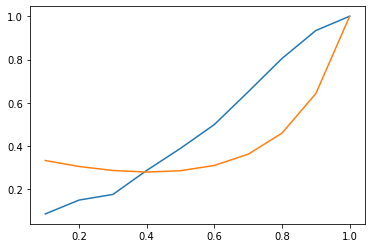

In [16]:
Ger3Res = connection_prob(Ger)
prob = []
for pbad in node_p:
    prob.append(irreducible(Ger,n,pbad)) 
plt.plot(node_p,prob)
plt.plot(node_p, Ger3Res)

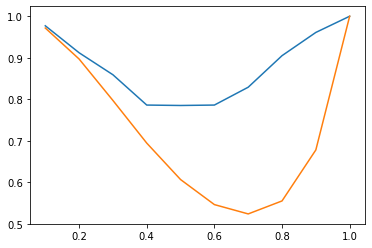

In [17]:
Gba3Res = connection_prob(Gba)
prob = []
for pbad in node_p:
    prob.append(irreducible(Gba,n,pbad)) 
plt.plot(node_p,prob)
plt.plot(node_p, Gba3Res)

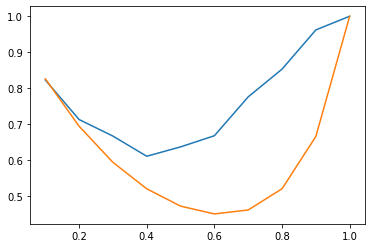

In [18]:
Gws3Res = connection_prob(Gws)
prob = []
for pbad in node_p:
    prob.append(irreducible(Gws,n,pbad)) 
plt.plot(node_p,prob)
plt.plot(node_p, Gws3Res)

#### همانطور که مشخص است شکل مشابهی دارند اما اختلاف دارند و این اختلاف به علت خطاست

### prove num6 formula

In [19]:
def phi(graph, p):
    n = graph.number_of_nodes()
    result = 0
    for i in range(1, n):
        ci = len(list(nx.all_node_cuts(graph, i)))
        result += ci * (p ** i) * ((1 - p) ** (n - i))

    return result


def Rel(graph, p):
    return 1 - phi(graph, p)

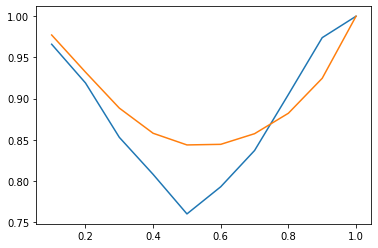

In [24]:
prob6 = []
for pbad in node_p:
    prob6.append(Rel(Gba,pbad))
prob = []
for pbad in node_p:
    prob.append(irreducible(Gba,n,pbad)) 
plt.plot(node_p,prob)
plt.plot(node_p, prob6)

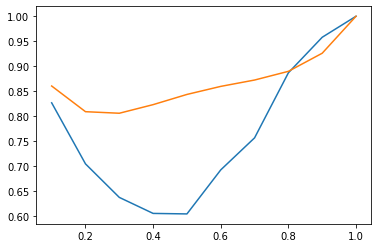

In [23]:
prob6 = []
for pbad in node_p:
    prob6.append(Rel(Gws,pbad))
prob = []
for pbad in node_p:
    prob.append(irreducible(Gws,n,pbad)) 
plt.plot(node_p,prob)
plt.plot(node_p, prob6)

# Phase 2

### Dynamic

In [ ]:
import dynetx as dn

In [ ]:
g = dn.DynGraph(edge_removal=True)
g.add_interaction(u=1, v=2, t=0, e=3)
# In the above example the interaction (1, 2) appear at time 0 and vanish at time 3, thus being present in [0, 2].

In [25]:
dn.write_interactions(g, 'graph_filename')

In [26]:
g = dn.read_interactions('graph_filename', nodetype=int, timestamptype=int)

In [27]:
g

In [44]:
n = 5 
p = 0.3
graph = nx.erdos_renyi_graph(n,p)
# nx.Graph()


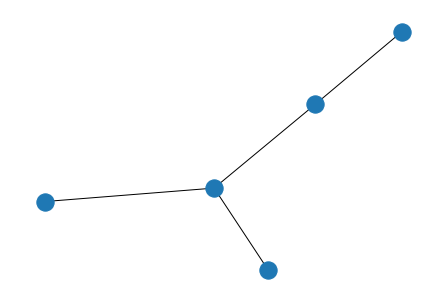

In [5]:
nx.draw(graph)

In [ ]:
# F(x) =1−e^(−λx) tozi'e bi hafeze dom nazoke namayi

In [103]:
landa = 2
def dom_nazok(n):
    return [1 -math.e ** (-2 * x ) for x in range(n)]
#     x = np.random.uniform(0, 1, size = n)
#     Li = []
#     for i in x:
#         y = 1 - math.exp(-2*i)
#         Li.append(y)
#     return Li

In [104]:
Li_nazok = dom_nazok(5)

In [105]:
Li_nazok

[0.0,
 0.8646647167633873,
 0.9816843611112658,
 0.9975212478233336,
 0.9996645373720975]

In [106]:
β = 1
α = 3

def dom_koloft(n, alpha=3, beta=1):
    return [1 - ( 1 + x) ** ( -3) for x in range(n)]
#     x = np.random.uniform(0, 10, size = n)
#     Li = []
#     for i in x:
#         y = 1-math.pow(1+i,-3)
#         Li.append(y)
#     return Li
    

In [96]:
Li_koloft = dom_koloft(5)

In [97]:
Li_koloft

[0.0, 0.875, 0.962962962962963, 0.984375, 0.992]

In [113]:
def expo(n, lam=2):
    return [1 -math.e ** (-lam * x ) for x in range(n)]

def pareto(n, alpha=3, beta=1):
    return [1 - ( 1 + x / beta) ** ( -alpha ) for x in range(n)]

In [ ]:
## tule omre har node ba yek uniform distribution moshakhas migardad.

In [ ]:
# Li = np.random.uniform(0, 10, size = )

In [125]:
SIM_DURATION = 100
NUMBER_OF_GRAPHS = 100
MAX_SEARCH_TIME = 5
IS_ACTIVE_MODEL = True
NUMBER_OF_NODES = 30
LAMBDA = 2
ALPHA = 3
BETA = 1
LAMBDA_POISSON = 0.2
N = 2
P = 0.1
DISTRIBUTION = 'exponential'

In [126]:
def reset_constants():
  global MAX_SEARCH_TIME, LAMBDA, ALPHA, BETA, LAMBDA_POISSON, N, P
  MAX_SEARCH_TIME = 5
  LAMBDA = 2
  ALPHA = 3
  BETA = 1
  LAMBDA_POISSON = 0.2
  N = 2
  P = 0.1

In [128]:
def random_list_exponential_distribution(n, my_lambda = LAMBDA):
      random_numbers = np.random.exponential(scale=(1/my_lambda), size=n)
      random_numbers = random_numbers * SIM_DURATION
      return random_numbers.astype(int).tolist()

def random_list_pareto_distribution(n, alpha=ALPHA, beta=BETA):
      random_numbers = (np.random.pareto(alpha, n)) * beta
      random_numbers = random_numbers * SIM_DURATION
      return random_numbers.astype(int).tolist()

def random_list_poisson_distribution(n, my_lambda=LAMBDA_POISSON):
      random_numbers = np.random.poisson(my_lambda, n)
      random_numbers = random_numbers * SIM_DURATION
      return random_numbers.astype(int).tolist()

def random_list_binomial_distribution(n, n_binomial=N, p=P):
      random_numbers = np.random.binomial(n_binomial, p, n)
      random_numbers = random_numbers * SIM_DURATION
      return random_numbers.astype(int).tolist()

In [129]:
# we use ER graphs
def create_graphs(n, p, graphsNo):
  ER_graphs = [None for i in range(graphsNo)]
  for i in range(graphsNo):
    G = nx.erdos_renyi_graph(n, p)
    ER_graphs[i] = G
  return ER_graphs

In [130]:
### returns element-lifetime pairs in discending order
def set_lifetimes(nodes, edges):
  nodes_lifetimes, edges_lifetimes = [], []
  if DISTRIBUTION == 'exponential':
    nodes_lifetimes = random_list_exponential_distribution(len(nodes))
    edges_lifetimes = random_list_exponential_distribution(len(edges))
  elif DISTRIBUTION == 'pareto':
    nodes_lifetimes = random_list_pareto_distribution(len(nodes))
    edges_lifetimes = random_list_pareto_distribution(len(edges))
  elif DISTRIBUTION == 'poisson':
    nodes_lifetimes = random_list_poisson_distribution(len(nodes))
    edges_lifetimes = random_list_poisson_distribution(len(edges))
  elif DISTRIBUTION == 'binomial':
    nodes_lifetimes = random_list_binomial_distribution(len(nodes))
    edges_lifetimes = random_list_binomial_distribution(len(edges))
  return sorted([i for i in zip(nodes_lifetimes, nodes)], reverse=True), sorted([i for i in zip(edges_lifetimes, edges)], reverse=True), np.mean(nodes_lifetimes)

In [131]:
def node_is_isolated(G, node):
  if not G.has_node(node):
    return 0
  return G.degree[node] == 0


def search_procedure(G, t, node, edges_to_add):
  # get a random number between 1 and max_search_time that will be the required time to find a new node to connect to
  search_time = math.ceil(random.random() * MAX_SEARCH_TIME)
  # search_time = 0
  # get a random node to connect to
  nodes = list(G.nodes)
  selected_node = random.choices(nodes)[0]
  # add the new connection to the sorted list
  new_edge_to_add = (t+search_time, (node, selected_node))
  edges_to_add.reverse()
  bisect.insort(edges_to_add, new_edge_to_add)
  edges_to_add.reverse()
  return edges_to_add


def add_isolation_time(Ts, t, node):
  if Ts[node] == SIM_DURATION:
  # if Ts[node] == -1:
    Ts[node] = t


def remove_nodes(G , nodes, t, edges_to_add, Ts):
  for node in nodes:
    neighbors = list(G.neighbors(node))
    G.remove_node(node)
    for neighbor in neighbors:
      if IS_ACTIVE_MODEL:
        search_procedure(G, t, neighbor, edges_to_add)
      if node_is_isolated(G, neighbor):
        add_isolation_time(Ts, t, neighbor)


def remove_edges(G , edges, t, edges_to_add, Ts):
  for edge in edges:
    node1, node2 = edge
    if (not G.has_node(node1)) or (not G.has_node(node2)) or (not G.has_edge(node1, node2)):
      continue
    G.remove_edge(node1, node2)
    if IS_ACTIVE_MODEL:
      search_procedure(G, t, node1, edges_to_add)
      search_procedure(G, t, node2, edges_to_add)
    if node_is_isolated(G, node1):
      add_isolation_time(Ts, t, node1)
    if node_is_isolated(G, node2):
      add_isolation_time(Ts, t, node2)


def check_lifetimes_and_remove(G, t, nodes_lifetimes, edges_lifetimes, Ts, edges_to_add):
  nodes_to_remove = []
  edges_to_remove = []
  while nodes_lifetimes and nodes_lifetimes[-1][0] <= t:
    nodes_to_remove.append(nodes_lifetimes.pop()[1])
  while edges_lifetimes and edges_lifetimes[-1][0] <= t:
    edges_to_remove.append(edges_lifetimes.pop()[1])

  remove_nodes(G, nodes_to_remove, t, edges_to_add, Ts);
  remove_edges(G, edges_to_remove, t, edges_to_add, Ts);

def add_new_edges(edges_to_add, edges_lifetimes, t, G):
  new_edges = []
  while edges_to_add and edges_to_add[-1][0] <= t:
    new_edge = edges_to_add.pop()[1]
    G.add_edge(new_edge[0], new_edge[1])
    new_edges.append(new_edge)
  _, new_edges_lifetimes, _ = set_lifetimes([], new_edges)
  edges_lifetimes = sorted(edges_lifetimes + new_edges_lifetimes, reverse=True)

In [132]:
def simulation(G, nodes_lifetimes, edges_lifetimes):
  # Ts = [-1 for x in range(len(nodes_lifetimes))]
  Ts = [0 if node_is_isolated(G, x) else SIM_DURATION for x in range(len(nodes_lifetimes))]
  edges_to_add = []
  for t in range(1, SIM_DURATION+1):
    check_lifetimes_and_remove(G, t, nodes_lifetimes, edges_lifetimes, Ts, edges_to_add)
    if IS_ACTIVE_MODEL:
      add_new_edges(edges_to_add, edges_lifetimes, t, G)

  # for index in range(len(Ts)-1, -1, -1):
  #   if Ts[index] == -1:
  #     del Ts[index]
  # if not Ts:
  #   return SIM_DURATION
  return Ts

In [133]:
def run_simulation(p, T_avgs_avg, average_degrees_avg, phis, average_lifetimes_avg):
  graphs = create_graphs(NUMBER_OF_NODES, p, NUMBER_OF_GRAPHS)
  average_degrees = []
  T_avgs = []
  lifetimes_avg = []
  number_of_isolated_graphs = 0
  for g in graphs:
    average_degrees.append(2*g.number_of_edges() / float(g.number_of_nodes()))
    nodes_lifetimes, edges_lifetimes, avg_lifetime = set_lifetimes(g.nodes, g.edges)
    Ts = simulation(g, nodes_lifetimes, edges_lifetimes)
    lifetimes_avg.append(avg_lifetime)
    T_avgs.append(statistics.mean(Ts))
    number_of_isolated_graphs += 1 if min(Ts) != SIM_DURATION else 0
  T_avgs_avg.append(statistics.mean(T_avgs))
  average_degrees_avg.append(statistics.mean(average_degrees))
  phis.append(number_of_isolated_graphs/NUMBER_OF_GRAPHS)
  average_lifetimes_avg.append(np.mean(lifetimes_avg))

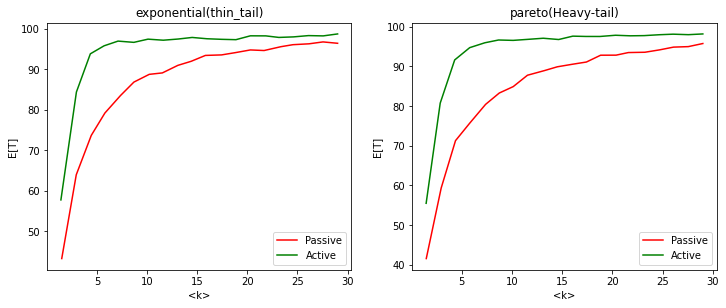

In [141]:
ps = [i/20 for i in range(1, 21)]
plt.figure(figsize=(12,10))

# exponential
plt.subplot(2,2,1)
reset_constants()
IS_ACTIVE_MODEL = False
DISTRIBUTION = 'exponential'
T_avgs, phis, degrees_avgs, lifetimes_avgs = [], [], [], []
for p in ps:
      run_simulation(p, T_avgs, degrees_avgs, phis, lifetimes_avgs)
plt.plot(degrees_avgs, T_avgs, label='Passive' , color='red')

reset_constants()
IS_ACTIVE_MODEL = True
T_avgs, phis, degrees_avgs, lifetimes_avgs = [], [], [], []
for p in ps:
      run_simulation(p, T_avgs, degrees_avgs, phis, lifetimes_avgs)
plt.plot(degrees_avgs, T_avgs, label='Active' , color='green')
plt.xlabel('<k>')
plt.ylabel('E[T]')
plt.title('exponential(thin_tail)')
plt.legend()

# pareto
plt.subplot(2,2,2)
reset_constants()
IS_ACTIVE_MODEL = False
DISTRIBUTION = 'pareto'
T_avgs, phis, degrees_avgs, lifetimes_avgs = [], [], [], []
for p in ps:
      run_simulation(p, T_avgs, degrees_avgs, phis, lifetimes_avgs)
plt.plot(degrees_avgs, T_avgs, label='Passive' , color='red')

reset_constants()
IS_ACTIVE_MODEL = True
T_avgs, phis, degrees_avgs, lifetimes_avgs = [], [], [], []
for p in ps:
      run_simulation(p, T_avgs, degrees_avgs, phis, lifetimes_avgs)
plt.plot(degrees_avgs, T_avgs, label='Active' , color='green')
plt.xlabel('<k>')
plt.ylabel('E[T]')
plt.title('pareto(Heavy-tail)')
plt.legend()

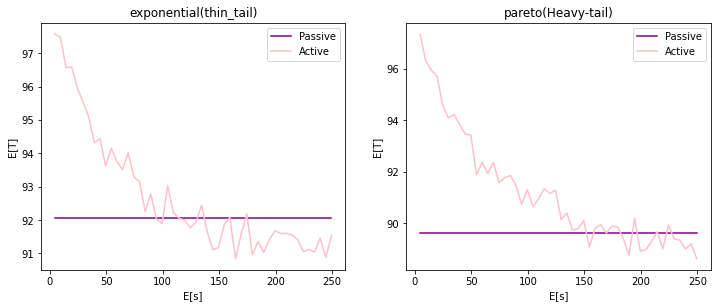

In [142]:
max_search_times = [i*10 for i in range(1, 51)]
mean_search_times = [(i-1)/2 for i in max_search_times]
plt.figure(figsize=(12,10))

# exponential
plt.subplot(2,2,1)
reset_constants()
IS_ACTIVE_MODEL = False
DISTRIBUTION = 'exponential'
T_avgs, phis1, degrees_avgs, lifetimes_avgs = [], [], [], []
run_simulation(0.5, T_avgs, degrees_avgs, phis1, lifetimes_avgs)
T_avgs = [T_avgs[0] for x in range(len(mean_search_times))]
phis1 = [phis1[0] for x in range(len(mean_search_times))]
plt.plot(mean_search_times, T_avgs, label='Passive' , color = 'purple')

reset_constants()
IS_ACTIVE_MODEL = True
T_avgs, phis2, degrees_avgs, lifetimes_avgs = [], [], [], []
for mst in max_search_times:
  MAX_SEARCH_TIME = mst
  run_simulation(0.5, T_avgs, degrees_avgs, phis2, lifetimes_avgs)
plt.plot(mean_search_times, T_avgs, label='Active' , color = 'pink')
plt.xlabel('E[s]')
plt.ylabel('E[T]')
plt.title('exponential(thin_tail)')
plt.legend()

# pareto
plt.subplot(2,2,2)
reset_constants()
IS_ACTIVE_MODEL = False
DISTRIBUTION = 'pareto'
T_avgs, phis3, degrees_avgs, lifetimes_avgs = [], [], [], []
run_simulation(0.5, T_avgs, degrees_avgs, phis3, lifetimes_avgs)
T_avgs = [T_avgs[0] for x in range(len(mean_search_times))]
phis3 = [phis3[0] for x in range(len(mean_search_times))]
plt.plot(mean_search_times, T_avgs, label='Passive' , color = 'purple')

reset_constants()
IS_ACTIVE_MODEL = True
T_avgs, phis4, degrees_avgs, lifetimes_avgs = [], [], [], []
for mst in max_search_times:
  MAX_SEARCH_TIME = mst
  run_simulation(0.5, T_avgs, degrees_avgs, phis4, lifetimes_avgs)
plt.plot(mean_search_times, T_avgs, label='Active' , color = 'pink')
plt.xlabel('E[s]')
plt.ylabel('E[T]')
plt.title('pareto(Heavy-tail)')
plt.legend()

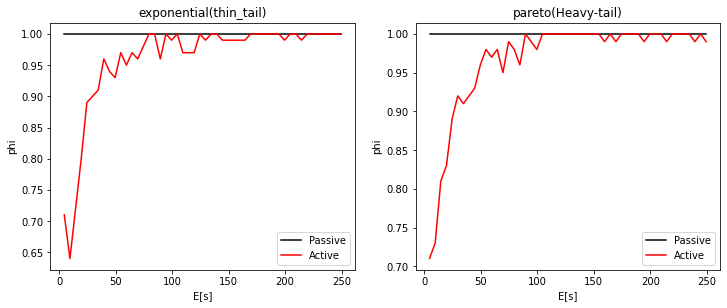

In [143]:
plt.figure(figsize=(12,10))

# exponential
plt.subplot(2,2,1)
plt.plot(mean_search_times, phis1, label='Passive' , color = 'black')
plt.plot(mean_search_times, phis2, label='Active' , color = 'red')
plt.xlabel('E[s]')
plt.ylabel('phi')
plt.title('exponential(thin_tail)')
plt.legend()

# pareto
plt.subplot(2,2,2)
plt.plot(mean_search_times, phis3, label='Passive' , color = 'black')
plt.plot(mean_search_times, phis4, label='Active' , color = 'red')
plt.xlabel('E[s]')
plt.ylabel('phi')
plt.title('pareto(Heavy-tail)')
plt.legend()

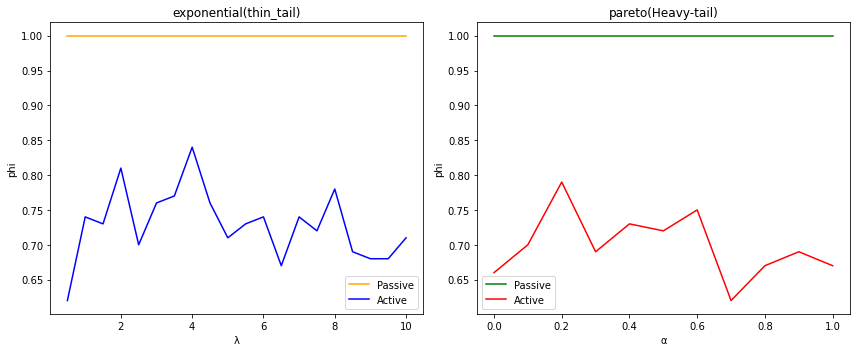

In [145]:
plt.figure(figsize=(12,5))
reset_constants()
lambdas = [x/2 for x in range(1, 21)]

# exponential
plt.subplot(1,2,1)
IS_ACTIVE_MODEL = False
DISTRIBUTION = 'exponential'
T_avgs, phis, degrees_avgs, lifetimes_avgs = [], [], [], []
for l in lambdas:
  LAMBDA = l
  run_simulation(0.5, T_avgs, degrees_avgs, phis, lifetimes_avgs)
plt.plot(lambdas, phis, label='Passive' , color = 'orange')

IS_ACTIVE_MODEL = True
T_avgs, phis, degrees_avgs, lifetimes_avgs = [], [], [], []
for b in lambdas:
  LAMBDA = l
  run_simulation(0.5, T_avgs, degrees_avgs, phis, lifetimes_avgs)
plt.plot(lambdas, phis, label='Active' , color = 'blue')
plt.xlabel('λ')
plt.ylabel('phi')
plt.title('exponential(thin_tail)')
plt.legend()

# pareto
plt.subplot(1,2,2)
IS_ACTIVE_MODEL = False
DISTRIBUTION = 'pareto'
T_avgs, phis, degrees_avgs, lifetimes_avgs = [], [], [], []
alphas = [i/10 for i in range(11)]
for l in alphas:
  ALPHA = l
  run_simulation(0.5, T_avgs, degrees_avgs, phis, lifetimes_avgs)
plt.plot(alphas, phis, label='Passive' , color = 'green')

IS_ACTIVE_MODEL = True
T_avgs, phis, degrees_avgs, lifetimes_avgs = [], [], [], []
for l in alphas:
  ALPHA = l
  run_simulation(0.5, T_avgs, degrees_avgs, phis, lifetimes_avgs)
plt.plot(alphas, phis, label='Active' , color = 'red')
plt.xlabel('α')
plt.ylabel('phi')
plt.title('pareto(Heavy-tail)')
plt.legend()
plt.tight_layout()

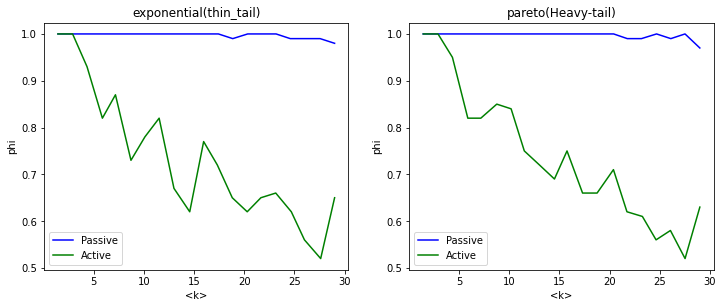

In [148]:
ps = [i/20 for i in range(1, 21)]
plt.figure(figsize=(12,10))

# exponential
plt.subplot(2,2,1)
reset_constants()
IS_ACTIVE_MODEL = False
DISTRIBUTION = 'exponential'
T_avgs, phis, degrees_avgs, lifetimes_avgs = [], [], [], []
for p in ps:
  run_simulation(p, T_avgs, degrees_avgs, phis, lifetimes_avgs)
plt.plot(degrees_avgs, phis, label='Passive' , color = 'blue')

reset_constants()
IS_ACTIVE_MODEL = True
T_avgs, phis, degrees_avgs, lifetimes_avgs = [], [], [], []
for p in ps:
  run_simulation(p, T_avgs, degrees_avgs, phis, lifetimes_avgs)
plt.plot(degrees_avgs, phis, label='Active' , color = 'green')
plt.xlabel('<k>')
plt.ylabel('phi')
plt.title('exponential(thin_tail)')
plt.legend()

# pareto
plt.subplot(2,2,2)
reset_constants()
IS_ACTIVE_MODEL = False
DISTRIBUTION = 'pareto'
T_avgs, phis, degrees_avgs, lifetimes_avgs = [], [], [], []
for p in ps:
  run_simulation(p, T_avgs, degrees_avgs, phis, lifetimes_avgs)
plt.plot(degrees_avgs, phis, label='Passive' , color = 'blue')

reset_constants()
IS_ACTIVE_MODEL = True
T_avgs, phis, degrees_avgs, lifetimes_avgs = [], [], [], []
for p in ps:
  run_simulation(p, T_avgs, degrees_avgs, phis, lifetimes_avgs)
plt.plot(degrees_avgs, phis, label='Active' , color = 'green')
plt.xlabel('<k>')
plt.ylabel('phi')
plt.title('pareto(Heavy-tail)')
plt.legend()